# Handwriting recognition

In [2]:
import matplotlib.pyplot as plt
import torchvision
import torch

In [3]:
# Load observations from the mnist dataset. The observations are divided into a training set and a test set
mnist_train = torchvision.datasets.MNIST('../data', train=True, download=True)
x_train = mnist_train.data.reshape(-1, 784).float()  # Reshape input
y_train = torch.zeros((mnist_train.targets.shape[0], 10))  # Create output tensor
y_train[torch.arange(mnist_train.targets.shape[0]), mnist_train.targets] = 1  # Populate output

mnist_test = torchvision.datasets.MNIST('../data', train=False, download=True)
x_test = mnist_test.data.reshape(-1, 784).float()  # Reshape input
y_test = torch.zeros((mnist_test.targets.shape[0], 10))  # Create output tensor
y_test[torch.arange(mnist_test.targets.shape[0]), mnist_test.targets] = 1  # Populate output

In [4]:
class SoftmaxModel:
    def __init__(self):
        w = torch.zeros([784, 10]).float()
        b = torch.zeros([1,10]).float()
        self.W = w.clone().detach().requires_grad_(True)
        self.b = b.clone().detach().requires_grad_(True)

    def logits(self, x):
        return torch.Tensor(x) @ self.W + self.b

    def f(self, x):
        return torch.softmax(self.logits(x))

    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x), y)

In [1]:
model = SoftmaxModel()
optimizer = torch.optim.SGD([model.W, model.b], 0.1)

for epoch in range(100):
    if epoch % 10 == 0:
        print(str(epoch) + "%", end = ' ')
    model.loss(x_train, y_train).backward()
    optimizer.step()
    optimizer.zero_grad()

print("\n")
print("Loss = %s" % model.loss(x_train, y_train))

NameError: name 'SoftmaxModel' is not defined

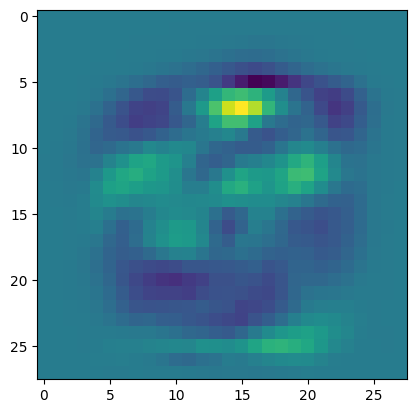

In [22]:
# Show the input of the first observation in the training set
for i in range(0, 10):
    plt.imshow(model.W[:, i].detach().numpy().reshape(28, 28))
    plt.imsave("../out/W" + str(i) + ".png", model.W[:, i].detach().numpy().reshape(28, 28))

plt.show()

In [23]:
# Evaluate and store the accuracy on the test set.
num_correct_test = 0
for x, y in zip(x_test, y_test):
    # y_pred = torch.argmax(x @ model.W)
    y_pred = torch.argmax(model.logits(x))
    if y_pred == torch.argmax(y):
        num_correct_test += 1

print("Accuracy: " + str(float(num_correct_test)/len(y_test)))

Accuracy: 0.8404
